# Question 1
- Learn and understand Zipf’s Law.
- Pick any file (or files) in NLTK package.
- Prove if Zipf’s Law works in Natural Language or not.
- REQUIREMNTS: (Must Do)
- Use ’glob’ to open and read file. If read multiple files use LOOP to achieve.
- Create at least one function and one lambda function.
- Save your data as an CSV file contains (Word, Rank, Frequency) with TITLE and Sort it by RANK.
- Open your CSV file, generate a log-log figure according to the data you saved.
- Write a conclusion at the end of your code base on your figure.

In [1]:
import glob
import os
import string
import re
filePath = '/Users/rajusingh/nltk_data/corpora/gutenberg/*'
class corporaName:     # class is defined with two funcs
    def fileList():    # func to access file list in given path
        c=glob.glob(filePath)
        return c
    
    def words(filePath): #func to create word list (stripping punctuation)
        with open(filePath,'r',encoding='windows-1252') as f: # diff encoding used to read file which orther fail reading in case of uft-8
            #words=[word1.strip(string.punctuation) for line in f for word1 in line.split()]
            #below line is equivalent of immediate above commented line
            p=lambda x: [word1.strip(string.punctuation) for line in x for word1 in line.split()]
            words=p(f)
        return words

In [2]:
# Define function to plot log-log graph and to generate csv files at local folder
import csv
import operator
import matplotlib.pyplot as plt

def csvGraph(dictOfFile,fileName): #filename and its dictionary are passed as argument to generate graph and csv for each files
    with open(fileName[45:-4]+('.csv'), 'w') as csvfile: # write cvs file with file name with header: Word, Freq & Rank
        fieldnames = ['Word', 'Frequency','Rank']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        r=1
        rank1 = []  # two new blank lists are created to store Rank and Freq values to use for plotting log-log graph
        Freq1 = []  
        for k,v in sorted(dictOfFile.items(), key=operator.itemgetter(1), reverse=True): #Iterating to create rank r as per freq, high fre has high rank
            writer.writerow({'Word': k, 'Frequency': v, 'Rank': r})
            r+=1
            rank1.append(r)
            Freq1.append(v)
    fig = plt.figure()
    fig.suptitle('Log-Log Graph'+ '\nof '+fileName[45:-4], fontsize=10, fontweight='bold') # Add sub title to graph
    plt.loglog(rank1, Freq1, basex=10, basey=10, linestyle='None',marker='.', markeredgecolor='blue') # log-log graph gnerated with base 10
    plt.show()  #to show the plot
    print("*********************************************************************************************************")
    print("\n")

In [3]:
# Define function to show analysis output of each file of particular corpora
m=0
n=0
def analysisResult(dictOfFile,fileName): # corpora name, filename and its dictionary passed as argument
    global m
    global n
    TW=sum(dictOfFile.values()) #sum of the value of key of a dictionary
    print('Total Number of words in',fileName[45:],'file :',TW)

    uw=len(set(corporaName.words(fileName))) # corporaName function is called
    r=FreqDist(dictOfFile).most_common(round(.2*uw)) #frequency dist for 20% of unique words
    xx=dict(r) #converting tuple into dict 
    TFW=sum(xx.values()) #sum of the values of each items

    print('Total Number of twenty most frequent words in',fileName[45:],'file :',TFW)

    Zipf=round((TFW*100)/TW)
    print('Percentage of top twenty percent words of whole contents of file :',Zipf)
    if Zipf >= 80: #If 80% of total contents covered by 20 % of words, zipf'law is valid else not
        print('For',fileName[45:],"Zipf's law holds True")
        m+=1
    else:
        print('For',fileName[45:],"Zipf law holds False")
        n+=1

In [4]:
# Main function to call other sub-functions
from nltk import FreqDist

def zipfValidity(corpora,noOfFile):
    global m
    global n
    c=corporaName.fileList()[:noOfFile] # corporaName function is called
    for file in c: #iterate over list of files of corpora
        text_final_counts1={} #new dict is created
        for word in corpora.words(file):
            word = word.lower()
            punctfilter = re.compile('.*[A-Za-z].*') # only words
            if punctfilter.match(word): #remove punctuation
                if word not in text_final_counts1: 
                    text_final_counts1[word] = 1 # if word appears first time, it will add to the dictionary, web_final_counts1
                else:
                    text_final_counts1[word] += 1 # if word reappears again it will add to the same dict, Shake_final_counts1  

        analysisResult(text_final_counts1,file) # call function: To show analysis for each corpora files
        
        csvGraph(text_final_counts1,file) # call function: To display graph and Create CSV at local folder
    print("Conclusion:")
    print("************")
    print("1. Out of given sample files, Zipf's law holds true for:",round(m*100/(m+n)),'% files.')
    print('''2. Zipf law follows in natural laguage rigidly but when text content fall short (say 1000 words),
    20-80% distribution condition does not remain valid.''')
    print('''3. If whole 19 files of gutenburg corpora is analyzed, we can see there are 2 files fail to hold
    20-80% ditribution and all these file have one thing common, their contents has less words.''')

Total Number of words in austen-emma.txt file : 158128
Total Number of twenty most frequent words in austen-emma.txt file : 145739
Percentage of top twenty percent words of whole contents of file : 92
For austen-emma.txt Zipf's law holds True


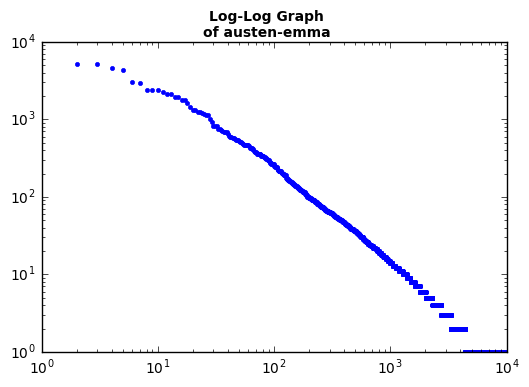

*********************************************************************************************************


Total Number of words in austen-persuasion.txt file : 83259
Total Number of twenty most frequent words in austen-persuasion.txt file : 74214
Percentage of top twenty percent words of whole contents of file : 89
For austen-persuasion.txt Zipf's law holds True


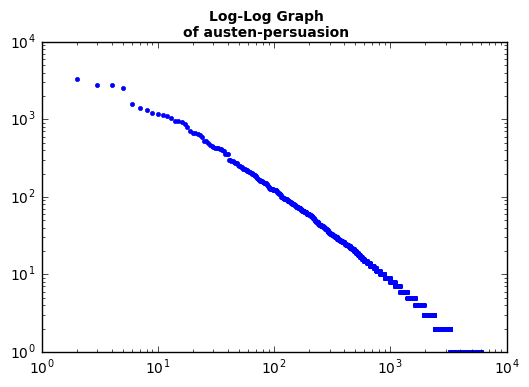

*********************************************************************************************************


Total Number of words in austen-sense.txt file : 118620
Total Number of twenty most frequent words in austen-sense.txt file : 107555
Percentage of top twenty percent words of whole contents of file : 91
For austen-sense.txt Zipf's law holds True


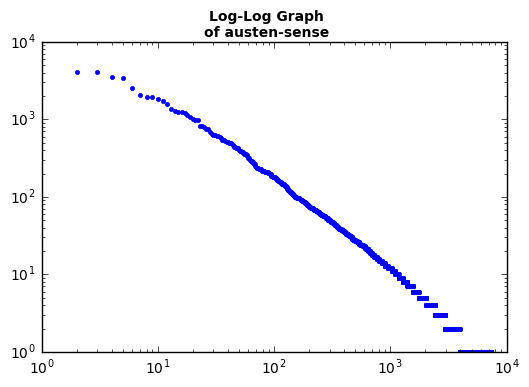

*********************************************************************************************************


Total Number of words in bible-kjv.txt file : 790029
Total Number of twenty most frequent words in bible-kjv.txt file : 766112
Percentage of top twenty percent words of whole contents of file : 97
For bible-kjv.txt Zipf's law holds True


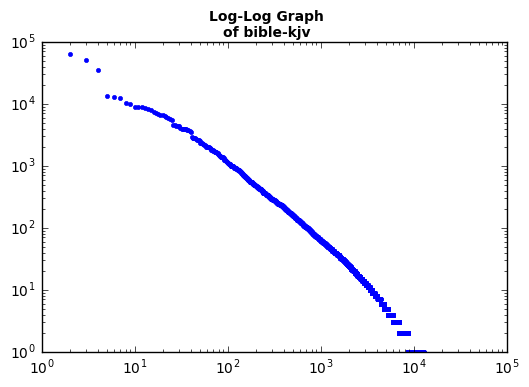

*********************************************************************************************************


Total Number of words in blake-poems.txt file : 6817
Total Number of twenty most frequent words in blake-poems.txt file : 5201
Percentage of top twenty percent words of whole contents of file : 76
For blake-poems.txt Zipf law holds False


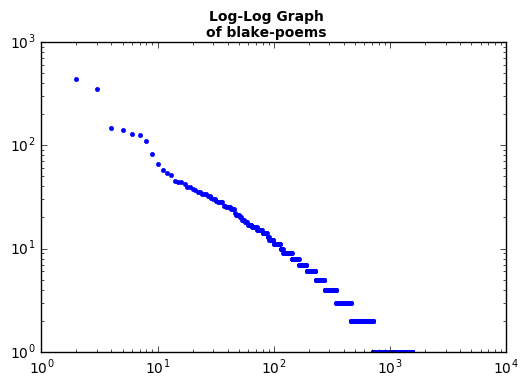

*********************************************************************************************************


Total Number of words in bryant-stories.txt file : 45971
Total Number of twenty most frequent words in bryant-stories.txt file : 40150
Percentage of top twenty percent words of whole contents of file : 87
For bryant-stories.txt Zipf's law holds True


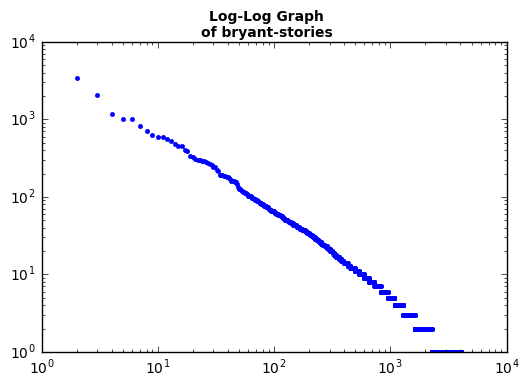

*********************************************************************************************************


Total Number of words in burgess-busterbrown.txt file : 15864
Total Number of twenty most frequent words in burgess-busterbrown.txt file : 13410
Percentage of top twenty percent words of whole contents of file : 85
For burgess-busterbrown.txt Zipf's law holds True


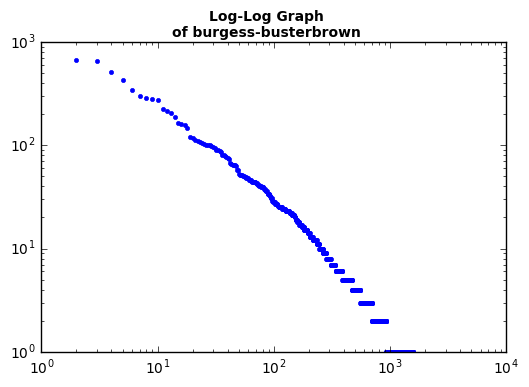

*********************************************************************************************************


Total Number of words in carroll-alice.txt file : 26382
Total Number of twenty most frequent words in carroll-alice.txt file : 22751
Percentage of top twenty percent words of whole contents of file : 86
For carroll-alice.txt Zipf's law holds True


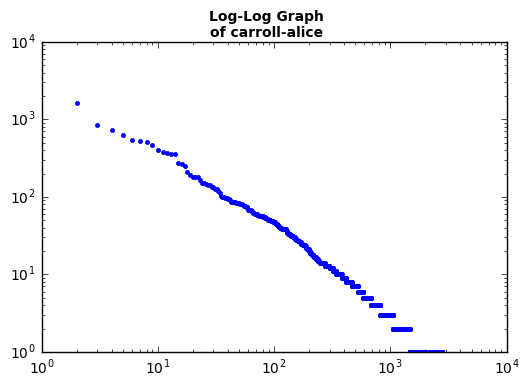

*********************************************************************************************************


Total Number of words in chesterton-ball.txt file : 81505
Total Number of twenty most frequent words in chesterton-ball.txt file : 71149
Percentage of top twenty percent words of whole contents of file : 87
For chesterton-ball.txt Zipf's law holds True


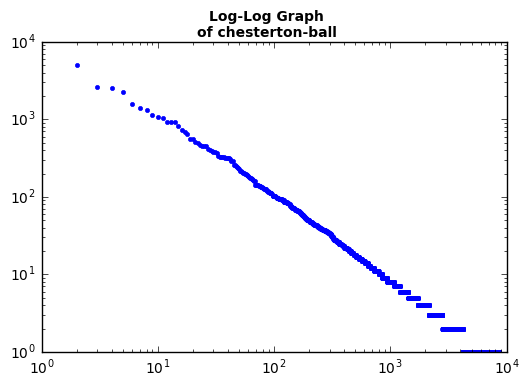

*********************************************************************************************************


Total Number of words in chesterton-brown.txt file : 71624
Total Number of twenty most frequent words in chesterton-brown.txt file : 61718
Percentage of top twenty percent words of whole contents of file : 86
For chesterton-brown.txt Zipf's law holds True


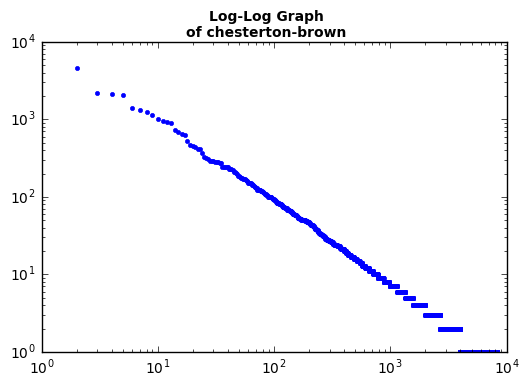

*********************************************************************************************************


Total Number of words in chesterton-thursday.txt file : 57911
Total Number of twenty most frequent words in chesterton-thursday.txt file : 49996
Percentage of top twenty percent words of whole contents of file : 86
For chesterton-thursday.txt Zipf's law holds True


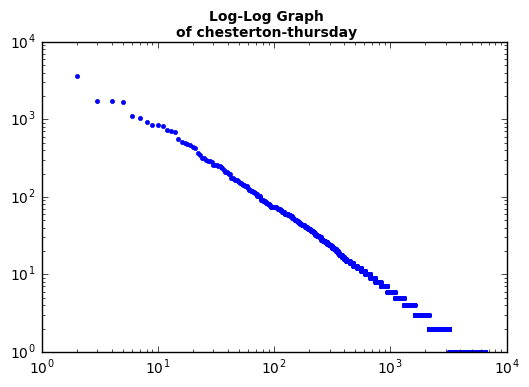

*********************************************************************************************************


Total Number of words in edgeworth-parents.txt file : 166000
Total Number of twenty most frequent words in edgeworth-parents.txt file : 151599
Percentage of top twenty percent words of whole contents of file : 91
For edgeworth-parents.txt Zipf's law holds True


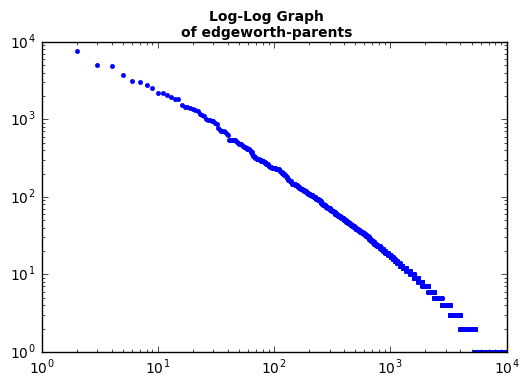

*********************************************************************************************************


Total Number of words in melville-moby_dick.txt file : 211802
Total Number of twenty most frequent words in melville-moby_dick.txt file : 188259
Percentage of top twenty percent words of whole contents of file : 89
For melville-moby_dick.txt Zipf's law holds True


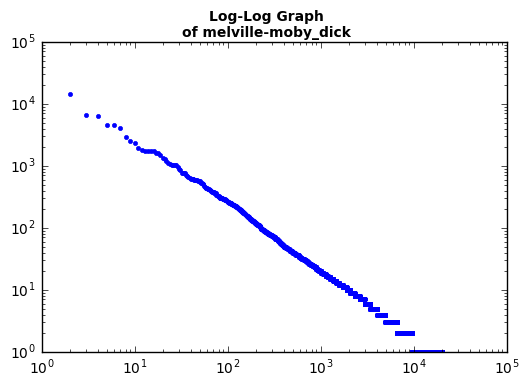

*********************************************************************************************************


Total Number of words in milton-paradise.txt file : 79645
Total Number of twenty most frequent words in milton-paradise.txt file : 68652
Percentage of top twenty percent words of whole contents of file : 86
For milton-paradise.txt Zipf's law holds True


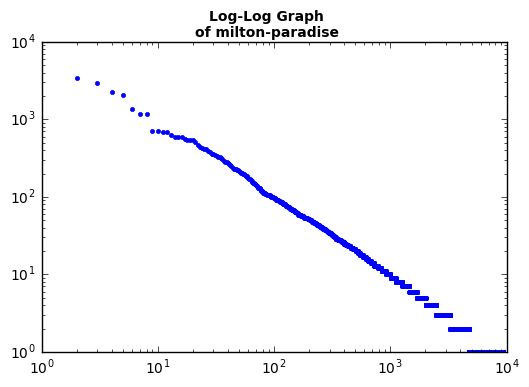

*********************************************************************************************************


Total Number of words in README file : 1435
Total Number of twenty most frequent words in README file : 953
Percentage of top twenty percent words of whole contents of file : 66
For README Zipf law holds False


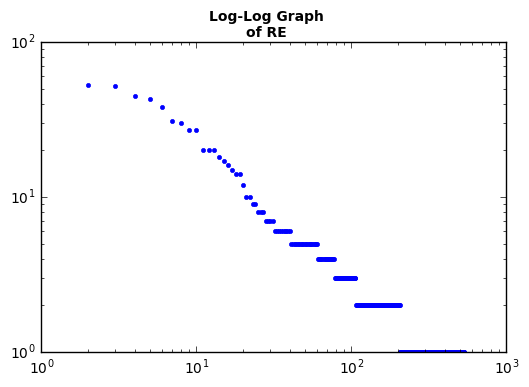

*********************************************************************************************************


Total Number of words in shakespeare-caesar.txt file : 20387
Total Number of twenty most frequent words in shakespeare-caesar.txt file : 17210
Percentage of top twenty percent words of whole contents of file : 84
For shakespeare-caesar.txt Zipf's law holds True


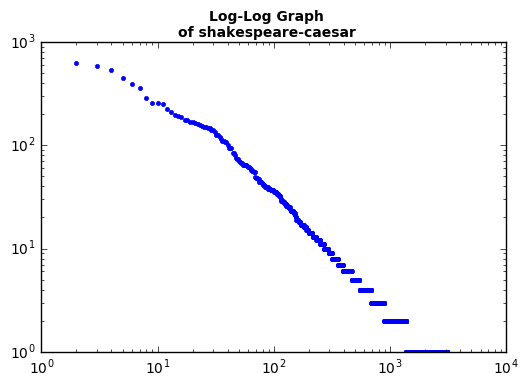

*********************************************************************************************************


Total Number of words in shakespeare-hamlet.txt file : 29578
Total Number of twenty most frequent words in shakespeare-hamlet.txt file : 25066
Percentage of top twenty percent words of whole contents of file : 85
For shakespeare-hamlet.txt Zipf's law holds True


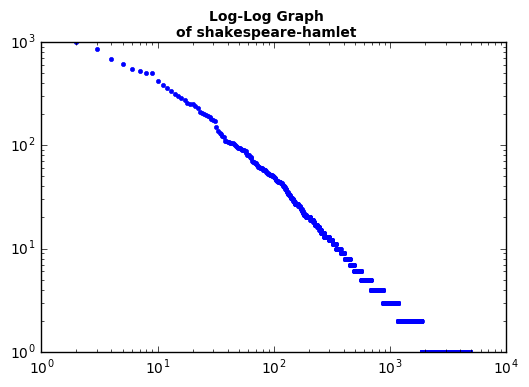

*********************************************************************************************************


Total Number of words in shakespeare-macbeth.txt file : 17649
Total Number of twenty most frequent words in shakespeare-macbeth.txt file : 14320
Percentage of top twenty percent words of whole contents of file : 81
For shakespeare-macbeth.txt Zipf's law holds True


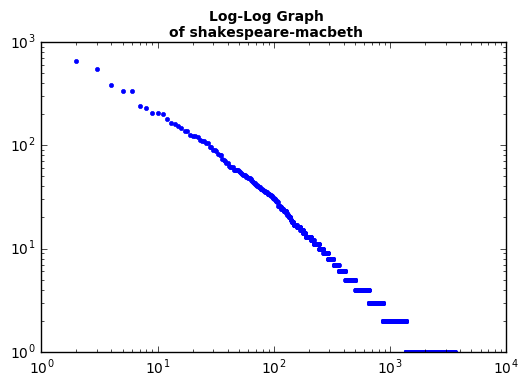

*********************************************************************************************************


Total Number of words in whitman-leaves.txt file : 121375
Total Number of twenty most frequent words in whitman-leaves.txt file : 105479
Percentage of top twenty percent words of whole contents of file : 87
For whitman-leaves.txt Zipf's law holds True


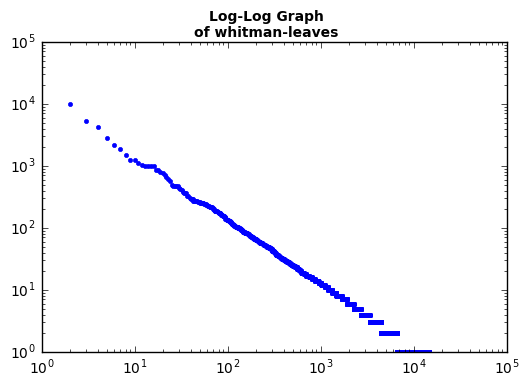

*********************************************************************************************************


Conclusion:
************
1. Out of given sample files, Zipf's law holds true for: 89 % files.
2. Zipf law follows in natural laguage rigidly but when text content fall short (say 1000 words),
    20-80% distribution condition does not remain valid.
3. If whole 19 files of gutenburg corpora is analyzed, we can see there are 2 files fail to hold
    20-80% ditribution and all these file have one thing common, their contents has less words.


In [5]:
# Call main function: Enter corpora name and no. of files of that corpora for which user wants result.
zipfValidity(corporaName,19) #passing class name corporaName and no of file for which analysis is used